# PayPal's Stock Analysis - Dissertation 2024

In [36]:
import numpy as np  #Importing Libraries and Loading Data-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

#The essential libraries are imported for data manipulation
#(numpy, pandas), visualization (matplotlib, seaborn), and time-series analysis (statsmodels).

In [2]:
df = pd.read_csv("C:/Users/lioul/Downloads/PayPal Monthly Stock Price Since 2015.csv") #The dataset, which contains PayPal's monthly stock prices, is loaded from a CSV file.

In [3]:
df.head()
#Displays the first few rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/1/2015,39.250000,39.910000,30.000000,35.000000,35.000000,246871400
1,9/1/2015,34.150002,35.459999,30.299999,31.040001,31.040001,199174100
2,10/1/2015,30.820000,36.650002,30.750000,36.009998,36.009998,197230400
3,11/1/2015,35.580002,38.520000,34.500000,35.259998,35.259998,197878100
4,12/1/2015,35.410000,37.680000,33.849998,36.200001,36.200001,156937600


In [4]:
df.describe()
#Provides descriptive statistics of the dataset, such as mean, standard deviation, min, max, etc.

,Open,High,Low,Close,Adj Close,Volume
count,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02
mean,101.035018,108.915027,92.487355,100.808000,100.808000,2.186760e+08
std,67.687309,73.068582,61.563907,66.684435,66.684435,9.743714e+07
min,30.820000,35.459999,30.000000,31.040001,31.040001,8.605324e+06
25%,58.714999,64.322498,56.485751,58.997499,58.997499,1.495380e+08
50%,79.774997,86.935001,72.175499,80.450001,80.450001,1.914345e+08
75%,110.929996,119.862497,102.540001,110.237502,110.237502,2.652750e+08
max,290.329987,310.160004,274.209991,291.480011,291.480011,6.715914e+08


In [5]:
df.info()
#Gives information about the dataset, including the number of entries, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       110 non-null    object 
 1   Open       110 non-null    float64
 2   High       110 non-null    float64
 3   Low        110 non-null    float64
 4   Close      110 non-null    float64
 5   Adj Close  110 non-null    float64
 6   Volume     110 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.1+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
#Converts the 'Date' column to datetime format and sets it as the index.

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
corr = df.corr() #Calculates the correlation matrix for all the numerical columns to see how the different variables are related.
corr.style.background_gradient(cmap = 'coolwarm') #Visualizes the correlation matrix using a heatmap.

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993639,0.987174,0.981383,0.981383,-0.049999
High,0.993639,1.000000,0.990132,0.990414,0.990414,-0.055401
Low,0.987174,0.990132,1.000000,0.994040,0.994040,-0.149860
Close,0.981383,0.990414,0.994040,1.000000,1.000000,-0.132938
Adj Close,0.981383,0.990414,0.994040,1.000000,1.000000,-0.132938
Volume,-0.049999,-0.055401,-0.149860,-0.132938,-0.132938,1.000000


<AxesSubplot:xlabel='Date'>

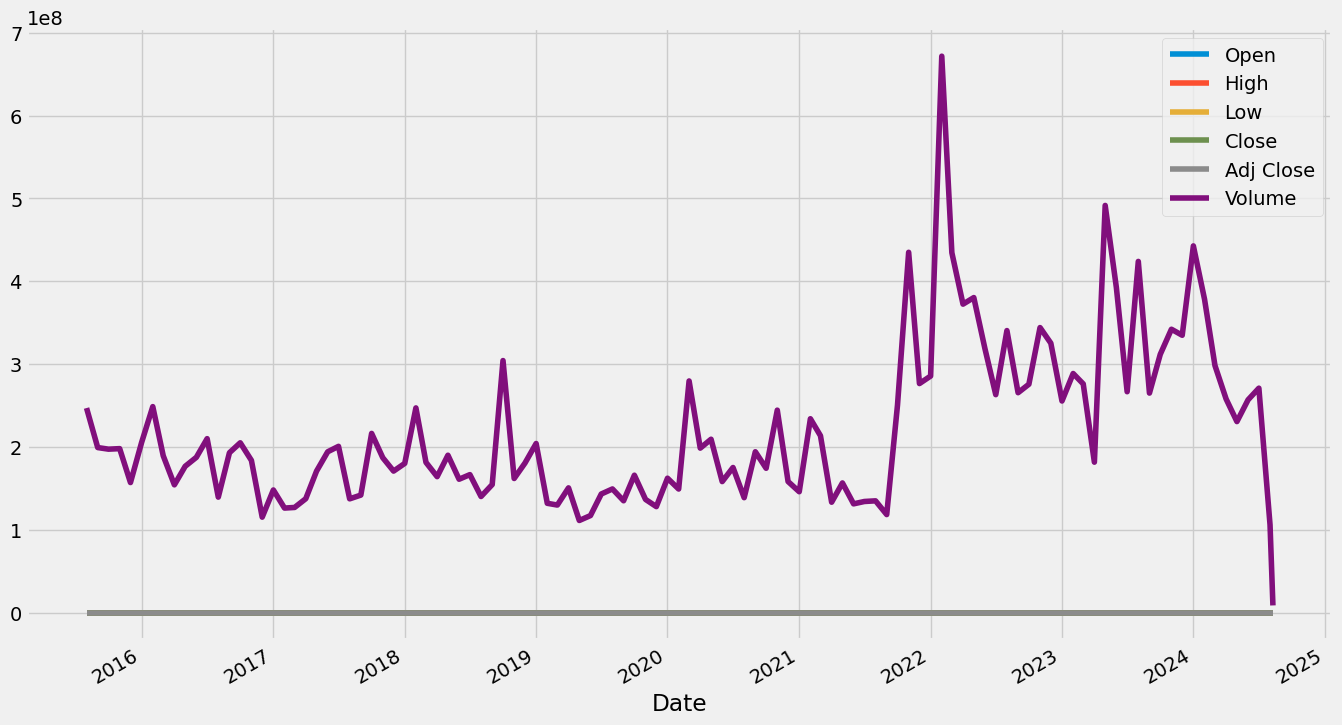

In [9]:
df.plot(figsize = (15,9))
#are plotted over time to observe trends 
#FIGSIZE:Plots all columns against the Date

Text(0.5, 1.0, 'Open and Close Prices')

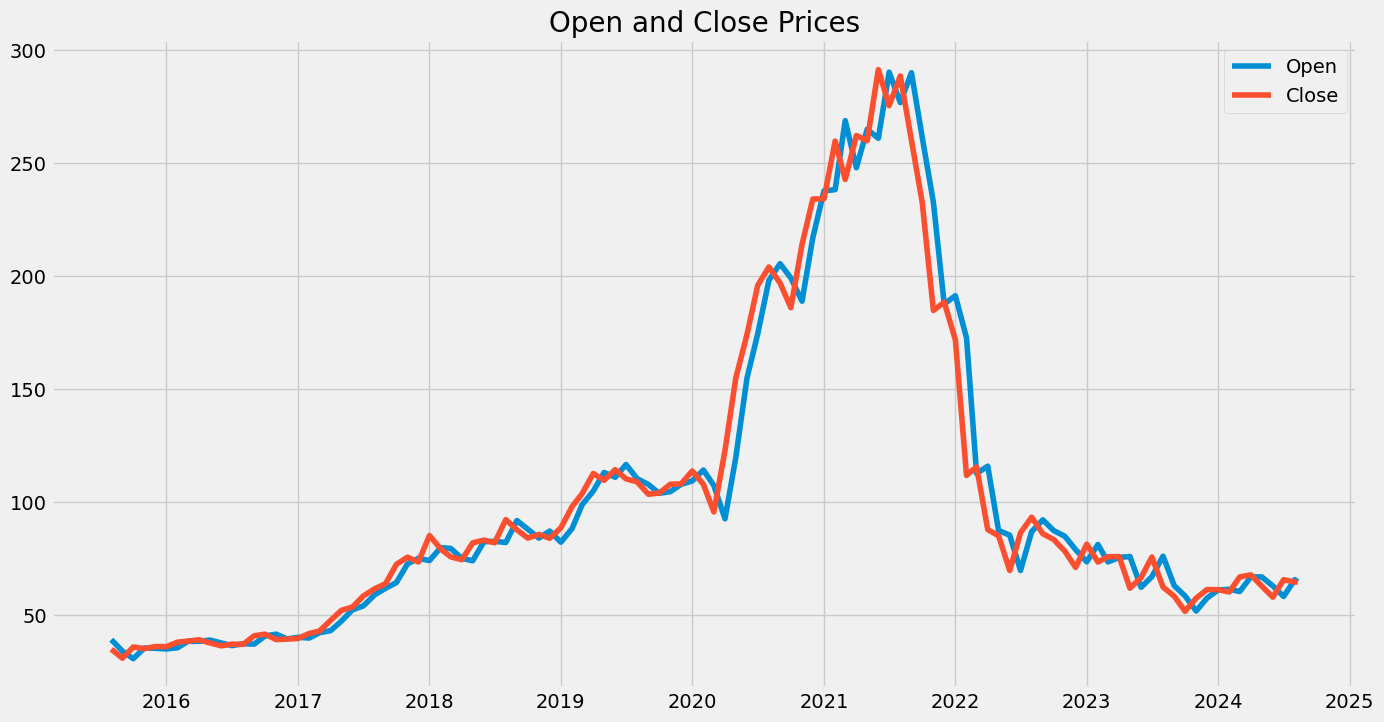

In [10]:
plt.figure(figsize = (15,8))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.legend(['Open', 'Close']) #Plots 'Open' and 'Close' prices together for comparison.
plt.title('Open and Close Prices', fontsize = 20)

#### MOVING AVERAGES

In [11]:
df['MA30'] = df['Adj Close'].rolling(window = 30).mean() #Computes the 30-day moving averages for the 'Adj Close' price.
df['MA100'] = df['Adj Close'].rolling(window = 100).mean() #Computes the 100-day moving averages for the 'Adj Close' price.

Text(0.5, 1.0, 'Moving Average and Close Prices')

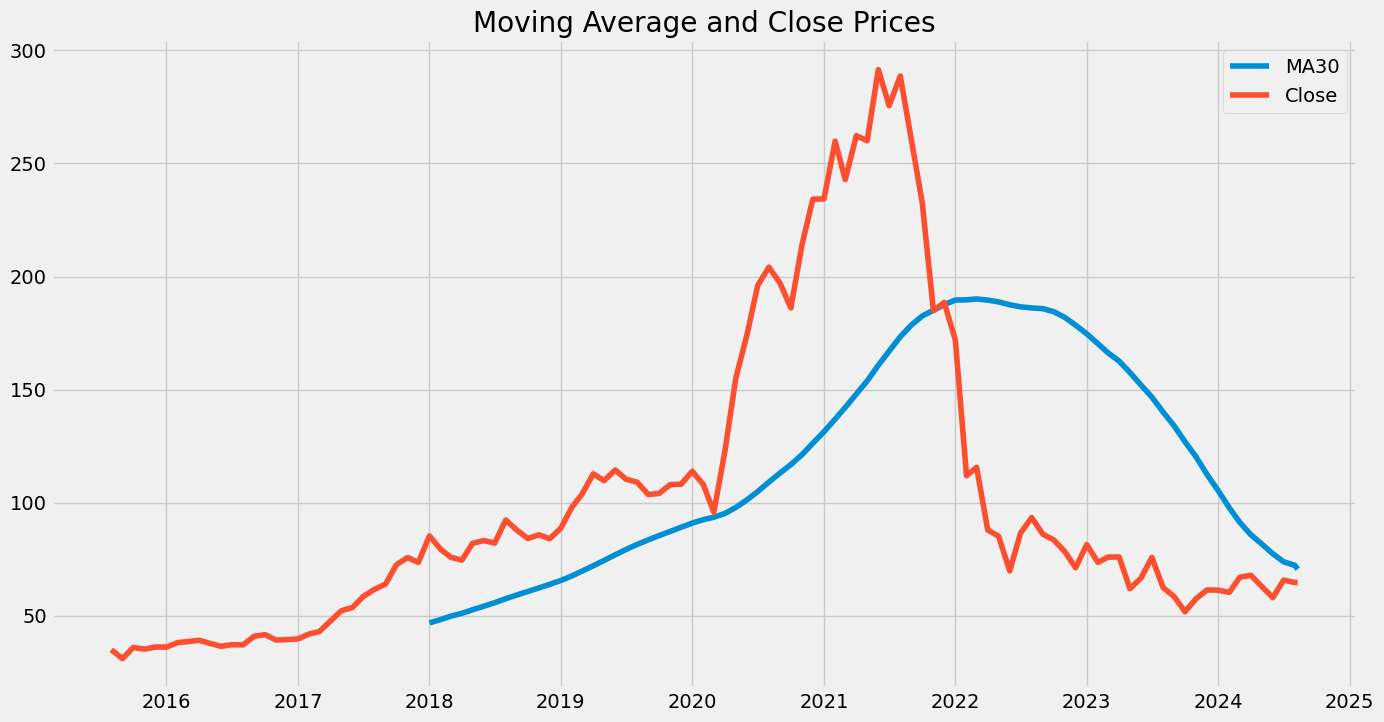

In [12]:
plt.figure(figsize = (15,8))
plt.plot(df['MA30'])
plt.plot(df['Close'])
plt.legend(['MA30','Close'])
plt.title('Moving Average and Close Prices') 

#Moving averages are plotted along with the actual 'Close' price to smooth out fluctuations and identify trends.

## SEASONAL COMPOSE

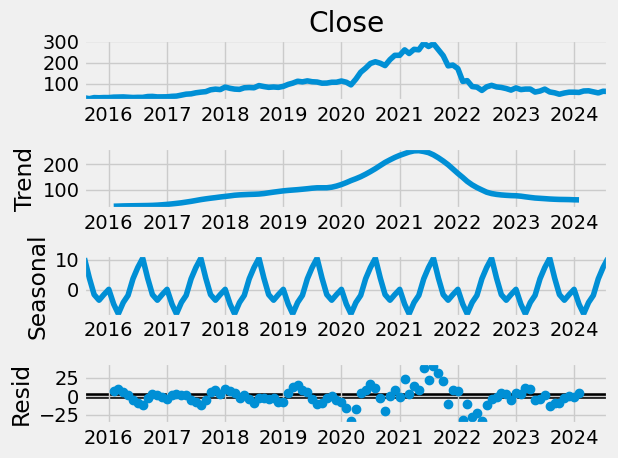

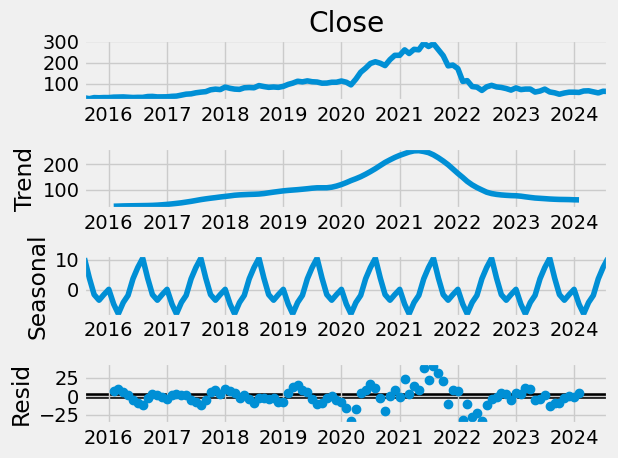

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

pay_month = df['Close'].resample('MS').mean()

decomposition = seasonal_decompose(pay_month, model = 'additive')
decomposition.plot()

#Decomposes the time series into seasonal, trend, and residual components to better understand the underlying patterns.

## Dickey-Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    
#Tests for stationarity in the time series using the Augmented Dickey-Fuller test.
#The results indicate whether the series is stationary, which is crucial for many time-series models.

In [15]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                 -2.037196
p-value                         0.270506
#Lags Used                     12.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64
None


In [16]:
print(adf_test(df['High'].resample('MS').mean().dropna()))

Results of Dickey-Fuller Test:
Test Statistic                 -1.997285
p-value                         0.287765
#Lags Used                     12.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
None


## KPSS TEST

In [17]:
from statsmodels.tsa.stattools import kpss

<AxesSubplot:xlabel='Date'>

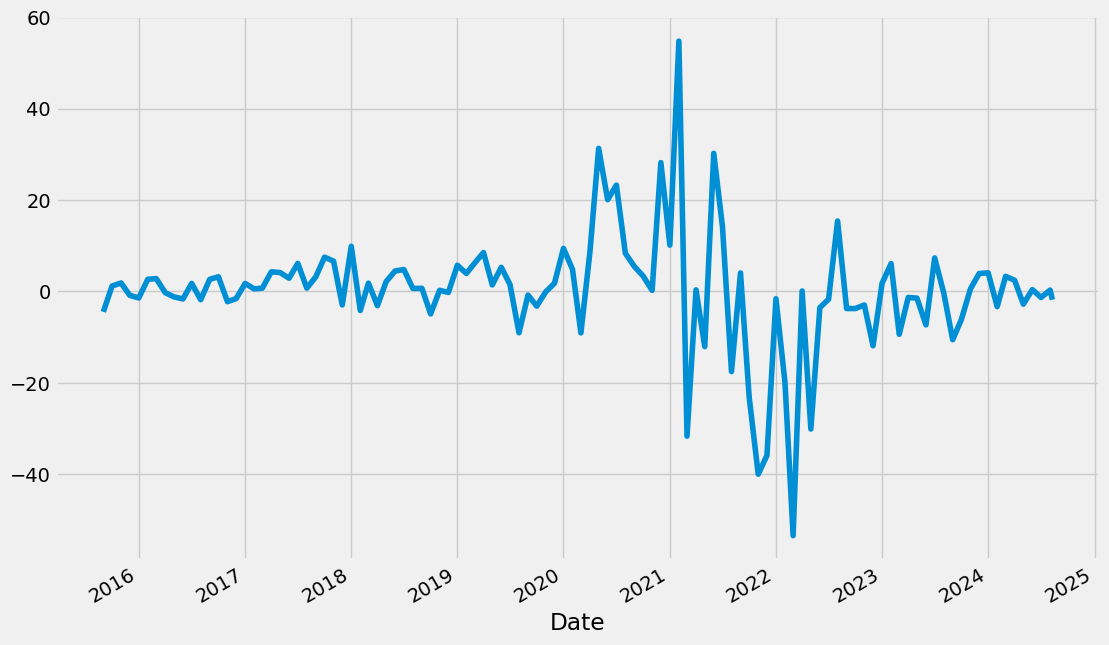

In [19]:
df['High_diff'] = df['High'] - df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (12,8))

#nother stationarity test, complementary to the Dickey-Fuller test. The code calculates the first difference of 'High' prices to visualize volatility.

# BUY OR SELL SIGNAL

In [20]:
data = pd.DataFrame()
data['Paypal'] = df['Adj Close']
data['MA30'] = df['MA30']
data['MA100'] = df['MA100']
data

,Paypal,MA30,MA100
Date,,,
2015-08-01,35.000000,NaN,NaN
2015-09-01,31.040001,NaN,NaN
2015-10-01,36.009998,NaN,NaN
2015-11-01,35.259998,NaN,NaN
2015-12-01,36.200001,NaN,NaN
...,...,...,...
2024-05-01,62.990002,81.776000,106.2598
2024-06-01,58.029999,77.424333,106.4587
2024-07-01,65.779999,73.885667,106.7305


In [21]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['MA30'][i] > data['MA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Paypal'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['MA30'][i] < data['MA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Paypal'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy,sigPriceSell)

In [22]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

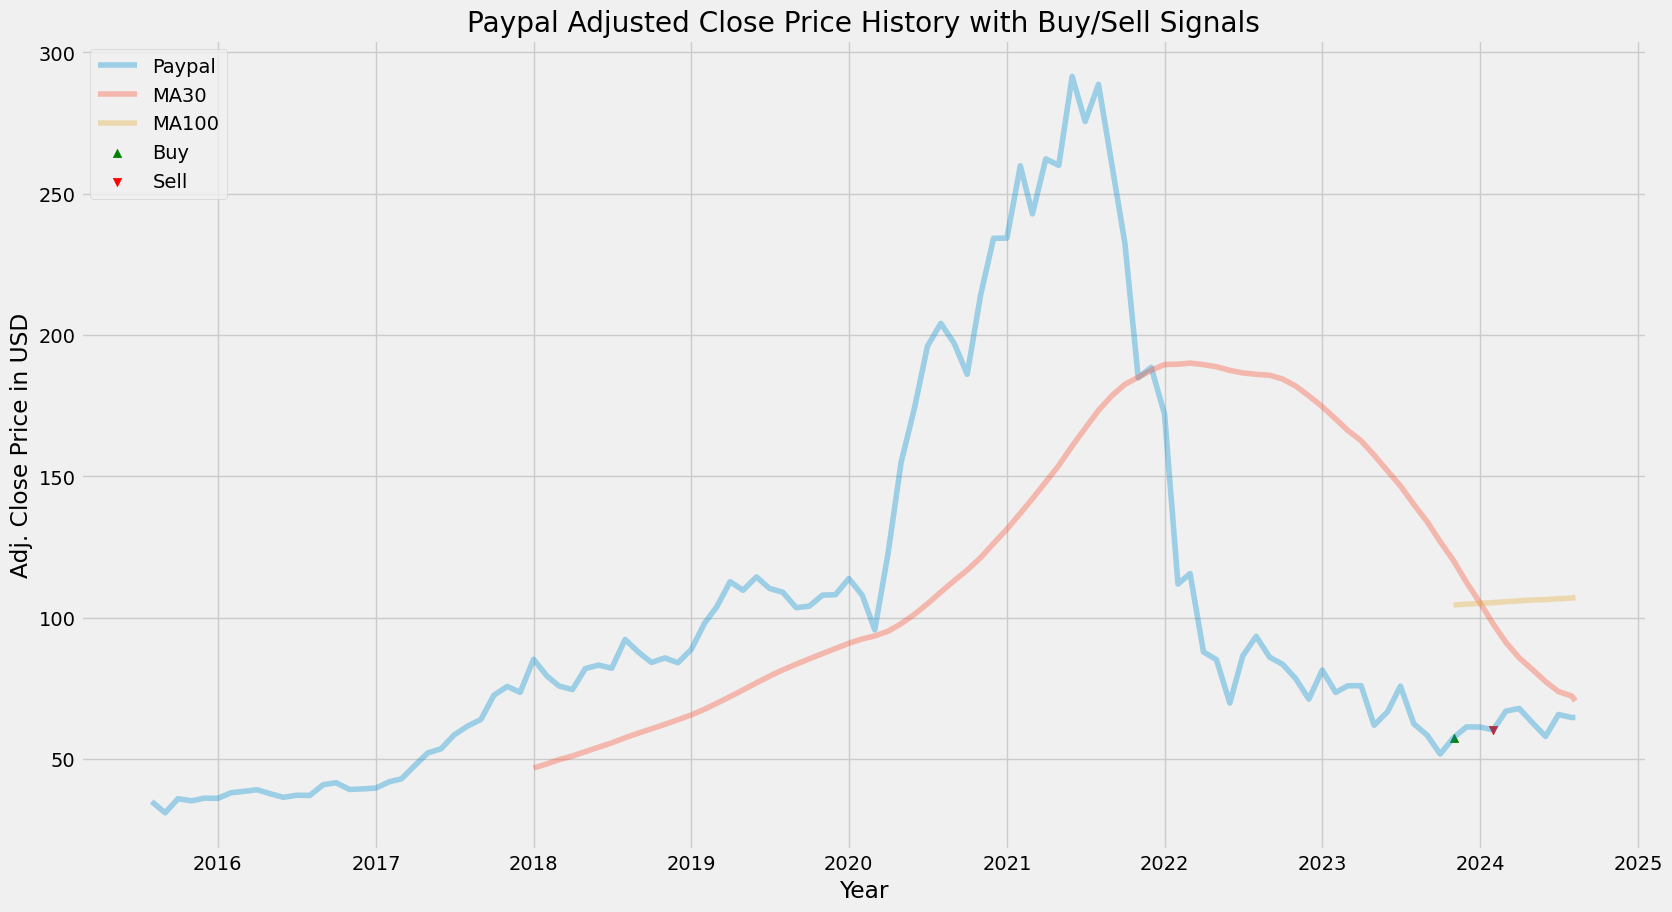

In [23]:
plt.figure(figsize=(18,10))
plt.plot(data['Paypal'], label = 'Paypal', alpha=0.35)
plt.plot(data['MA30'], label = 'MA30', alpha=0.35)
plt.plot(data['MA100'], label = 'MA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Paypal Adjusted Close Price History with Buy/Sell Signals')
plt.xlabel('Year')
plt.ylabel('Adj. Close Price in USD')
plt.legend(loc='upper left')
plt.show()

## BOLINGER BANDS METHOD

In [24]:
period = 20
# simple moving average
df['MA'] = df['Close'].rolling(window = period).mean()
# Standard Deviation
df['STD'] = df['Close'].rolling(window = period).std()
#Upper Band
df['Upper'] = df['MA'] + (df['STD'] * 2)
#Lower Band
df['Lower'] = df['MA'] - (df['STD'] * 2)

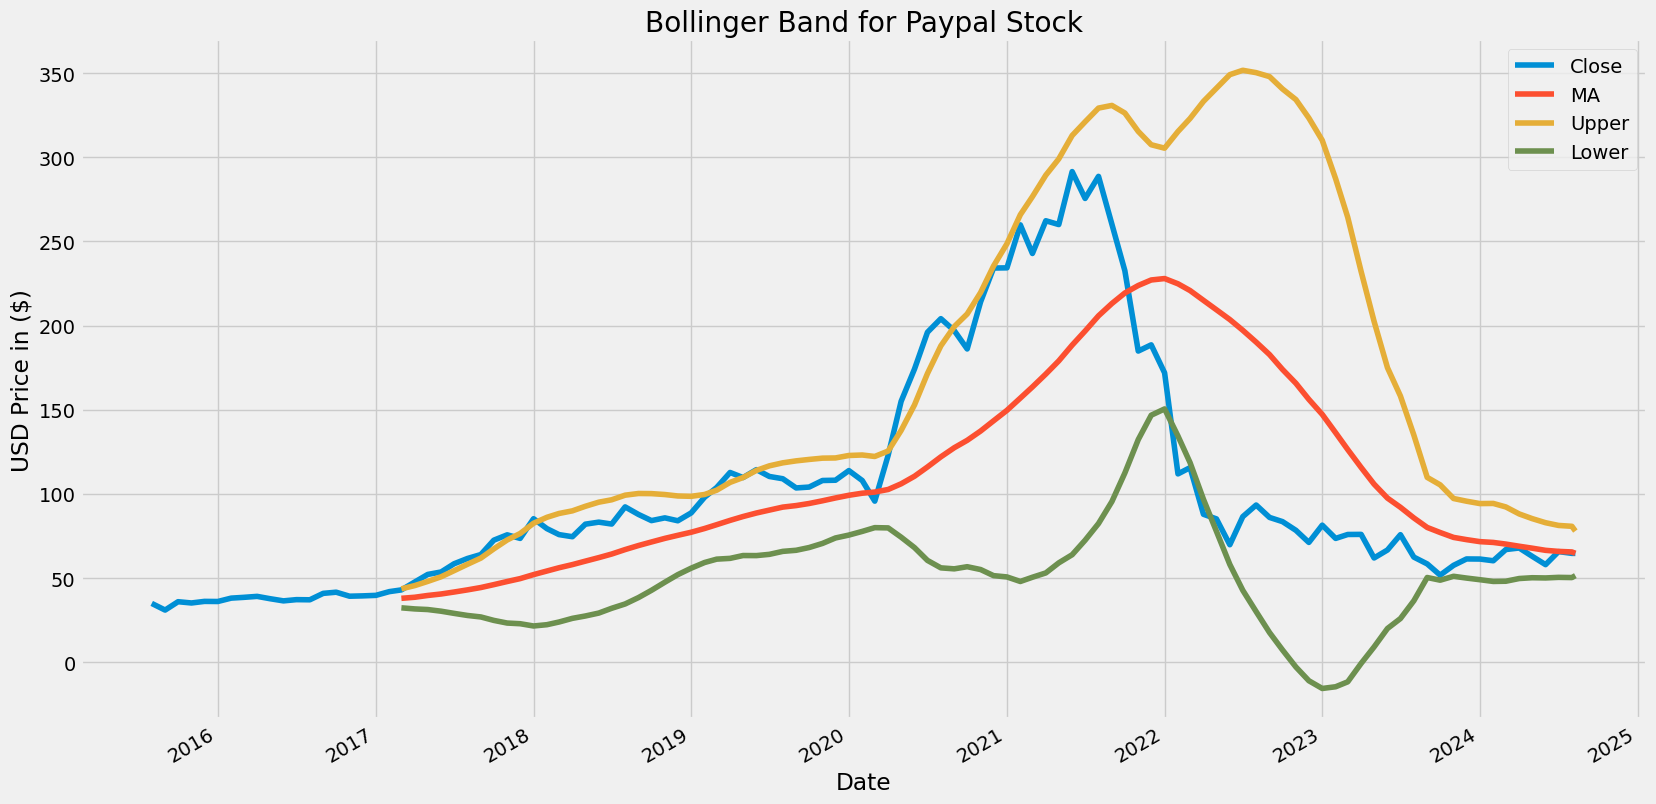

In [25]:
column_list = ['Close','MA','Upper','Lower']
df[column_list].plot(figsize = (18,10))
plt.title('Bollinger Band for Paypal Stock')
plt.ylabel('USD Price in ($)')
plt.show()

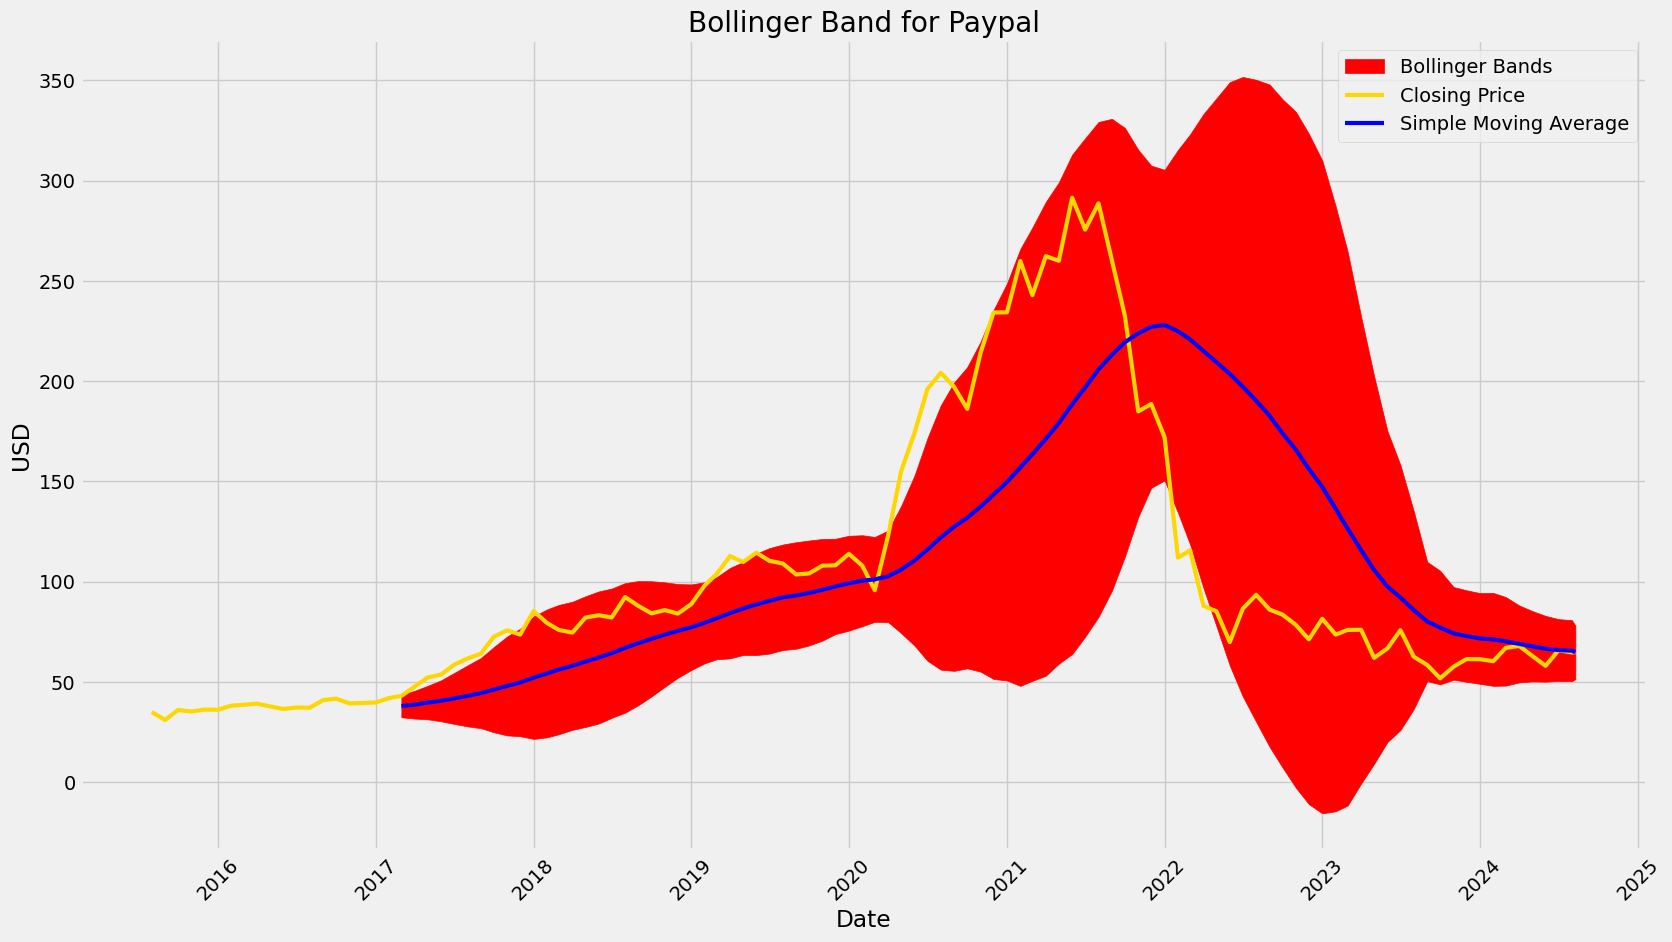

In [26]:
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(1,1,1)
x_axis = df.index
ax.fill_between(x_axis,df['Upper'], df['Lower'],label ='Bollinger Bands',color = 'red')
ax.plot(x_axis, df['Close'], color = 'gold',lw = 3, label= 'Closing Price')
ax.plot(x_axis, df['MA'], color = 'blue', lw=3, label='Simple Moving Average')
ax.set_title('Bollinger Band for Paypal')
ax.set_xlabel('Date')
ax.set_ylabel('USD')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

## MACD 

In [30]:
def get_MACD(df, column = 'Adj Close'):
    df['EMA-12'] = df[column].ewm(span = 12, adjust = False).mean()
    df['EMA-26'] = df[column].ewm(span = 26, adjust  = False).mean()
    
    df['MACD'] = df['EMA-12'] - df['EMA-26']
    df['Signal'] = df['MACD'].ewm(span = 9, adjust = False).mean()
    df['Histogram'] = df['MACD']- df['Signal']
    return df

In [31]:
get_MACD(df)

,Open,High,Low,Close,Adj Close,Volume,MA30,MA100,High_diff,MA,STD,Upper,Lower,EMA-12,EMA-26,MACD,Signal,Histogram
Date,,,,,,,,,,,,,,,,,,
2015-08-01,39.250000,39.910000,30.000000,35.000000,35.000000,246871400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,35.000000,0.000000,0.000000,0.000000
2015-09-01,34.150002,35.459999,30.299999,31.040001,31.040001,199174100,NaN,NaN,-4.450001,NaN,NaN,NaN,NaN,34.390769,34.706667,-0.315897,-0.063179,-0.252718
2015-10-01,30.820000,36.650002,30.750000,36.009998,36.009998,197230400,NaN,NaN,1.190003,NaN,NaN,NaN,NaN,34.639881,34.803210,-0.163328,-0.083209,-0.080119
2015-11-01,35.580002,38.520000,34.500000,35.259998,35.259998,197878100,NaN,NaN,1.869998,NaN,NaN,NaN,NaN,34.735284,34.837046,-0.101762,-0.086920,-0.014842
2015-12-01,35.410000,37.680000,33.849998,36.200001,36.200001,156937600,NaN,NaN,-0.840000,NaN,NaN,NaN,NaN,34.960625,34.938006,0.022620,-0.065012,0.087631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,67.000000,67.889999,60.849998,62.990002,62.990002,230517500,81.776000,106.2598,-2.772004,67.8080,8.777967,85.363935,50.252066,66.221003,83.799897,-17.578894,-21.690494,4.111601
2024-06-01,63.040001,68.299004,57.209999,58.029999,58.029999,256822000,77.424333,106.4587,0.409005,66.5305,8.202100,82.934701,50.126299,64.960849,81.891016,-16.930167,-20.738429,3.808262
2024-07-01,58.360001,66.989998,56.970001,65.779999,65.779999,270887100,73.885667,106.7305,-1.309006,65.8990,7.710824,81.320648,50.477351,65.086872,80.697607,-15.610735,-19.712890,4.102155


Text(0.5, 1.0, 'MACD and Signal')

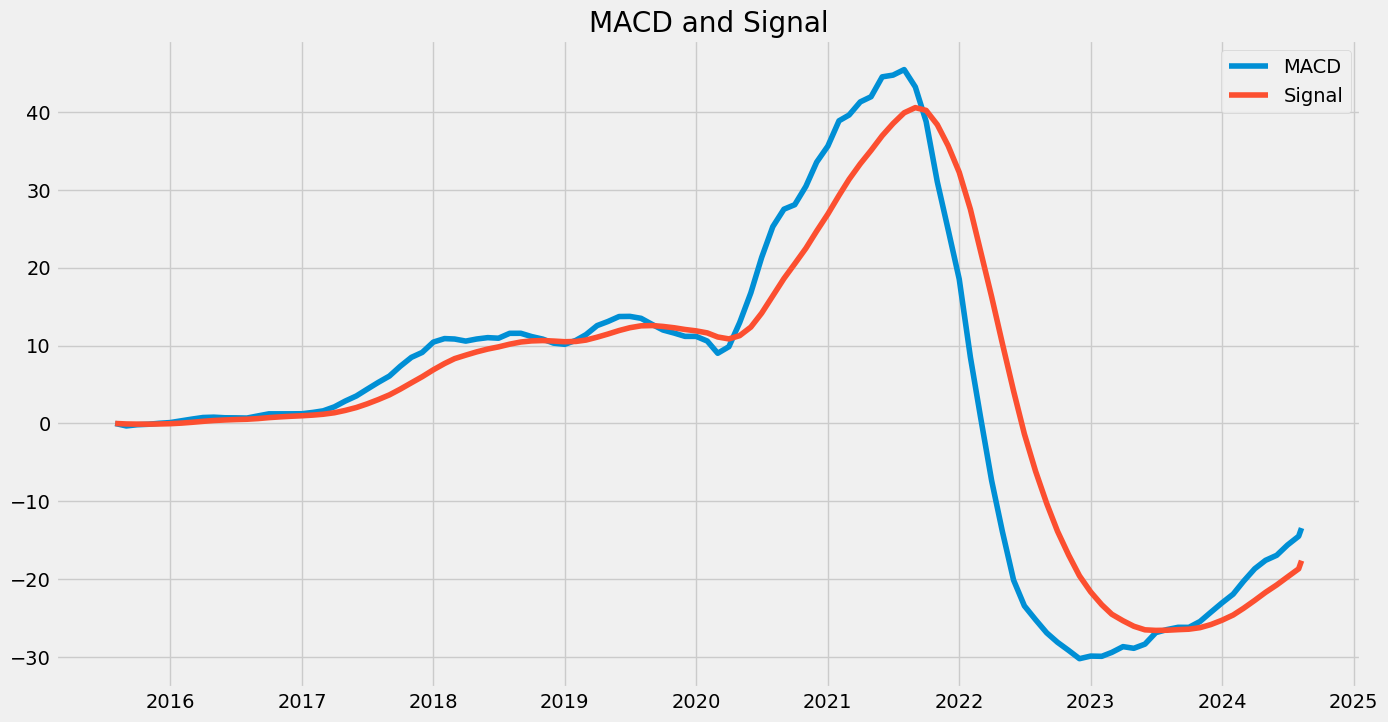

In [32]:
plt.figure(figsize = (15,8))
plt.plot(df['MACD'])
plt.plot(df['Signal'])
plt.legend(['MACD','Signal'])
plt.title('MACD and Signal')

## Relative Strength Index

In [33]:
def get_RSI(df, column = 'Adj Close', time_window = 14):
    diff = df[column].diff(1)
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    up_chg[diff > 0] = diff[diff > 0]
    down_chg[diff < 0] = diff[diff < 0]
    
    up_chg_avg = up_chg.ewm(com= time_window -1, min_periods = time_window).mean()
    down_chg_avg = down_chg.ewm(com = time_window -1, min_periods = time_window).mean()
    
    RS = abs(up_chg_avg/down_chg_avg)
    df['RSI'] = 100 - 100 / (1 + RS)
    
    return df

#which measures the speed and change of price movements to identify overbought or oversold conditions.

In [34]:
get_RSI(df)

,Open,High,Low,Close,Adj Close,Volume,MA30,MA100,High_diff,MA,STD,Upper,Lower,EMA-12,EMA-26,MACD,Signal,Histogram,RSI
Date,,,,,,,,,,,,,,,,,,,
2015-08-01,39.250000,39.910000,30.000000,35.000000,35.000000,246871400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,35.000000,0.000000,0.000000,0.000000,NaN
2015-09-01,34.150002,35.459999,30.299999,31.040001,31.040001,199174100,NaN,NaN,-4.450001,NaN,NaN,NaN,NaN,34.390769,34.706667,-0.315897,-0.063179,-0.252718,NaN
2015-10-01,30.820000,36.650002,30.750000,36.009998,36.009998,197230400,NaN,NaN,1.190003,NaN,NaN,NaN,NaN,34.639881,34.803210,-0.163328,-0.083209,-0.080119,NaN
2015-11-01,35.580002,38.520000,34.500000,35.259998,35.259998,197878100,NaN,NaN,1.869998,NaN,NaN,NaN,NaN,34.735284,34.837046,-0.101762,-0.086920,-0.014842,NaN
2015-12-01,35.410000,37.680000,33.849998,36.200001,36.200001,156937600,NaN,NaN,-0.840000,NaN,NaN,NaN,NaN,34.960625,34.938006,0.022620,-0.065012,0.087631,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,67.000000,67.889999,60.849998,62.990002,62.990002,230517500,81.776000,106.2598,-2.772004,67.8080,8.777967,85.363935,50.252066,66.221003,83.799897,-17.578894,-21.690494,4.111601,38.878218
2024-06-01,63.040001,68.299004,57.209999,58.029999,58.029999,256822000,77.424333,106.4587,0.409005,66.5305,8.202100,82.934701,50.126299,64.960849,81.891016,-16.930167,-20.738429,3.808262,37.024360
2024-07-01,58.360001,66.989998,56.970001,65.779999,65.779999,270887100,73.885667,106.7305,-1.309006,65.8990,7.710824,81.320648,50.477351,65.086872,80.697607,-15.610735,-19.712890,4.102155,41.702013


Text(0.5, 1.0, 'Relative Strength Index')

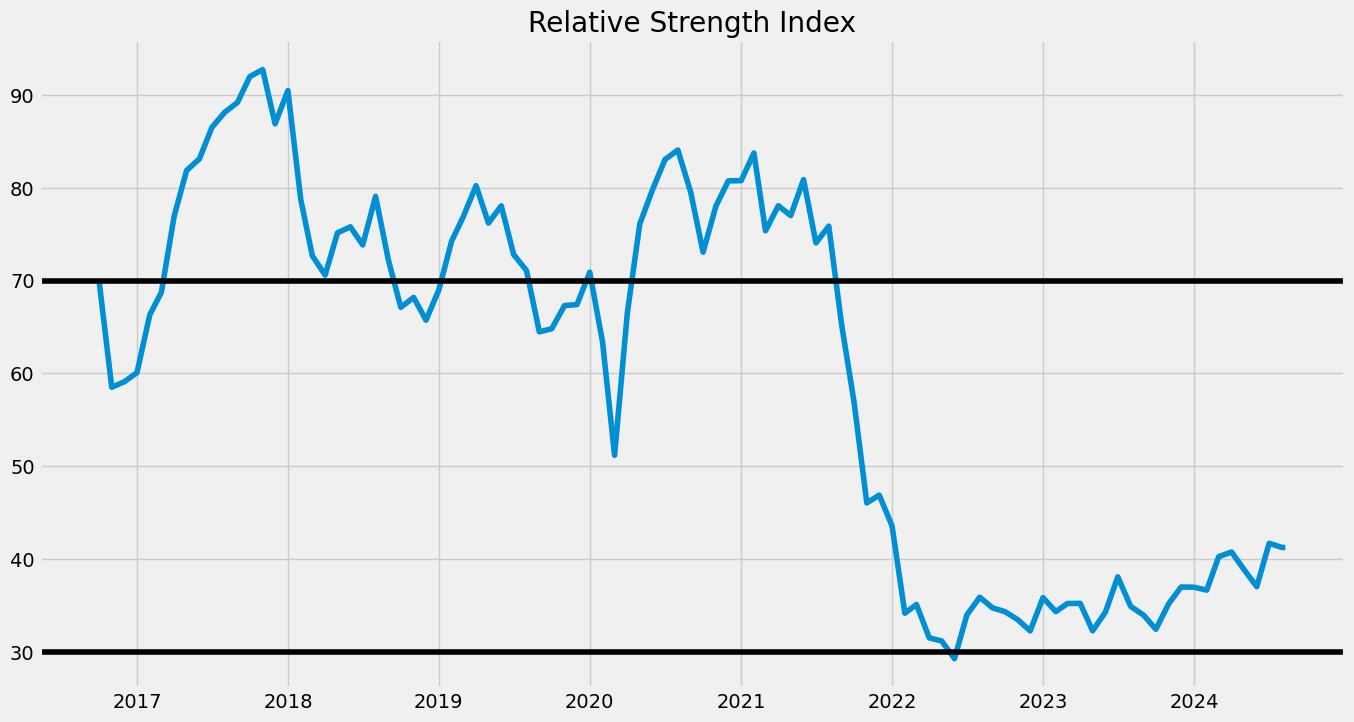

In [35]:
plt.figure(figsize = (15,8))
plt.plot(df['RSI'])
plt.axhline(y = 30, color = 'black')
plt.axhline(y = 70, color = 'black')
plt.title('Relative Strength Index')

#RSI values are typically plotted with thresholds at 30 (oversold) and 70 (overbought) to provide trading signals.

## Sequential Modeling

In [37]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

ModuleNotFoundError: No module named 'keras'

In [38]:
data = df.filter(['Close'])
dataset = data.values
training_len = math.ceil(len(dataset)*0.8)
training_len

88

In [39]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01520503],
       [0.        ],
       [0.01908308],
       [0.01620334],
       [0.01981262],
       [0.01958224],
       [0.02726155],
       [0.02902779],
       [0.03125479],
       [0.02591768],
       [0.02100291],
       [0.02380587],
       [0.0234603 ],
       [0.03812778],
       [0.04077714],
       [0.03163876],
       [0.0323683 ],
       [0.03355858],
       [0.04208262],
       [0.04599907],
       [0.06404546],
       [0.08128551],
       [0.0868914 ],
       [0.10562892],
       [0.11764705],
       [0.12667024],
       [0.1594225 ],
       [0.17159423],
       [0.16349255],
       [0.20841651],
       [0.18572416],
       [0.17213178],
       [0.1672938 ],
       [0.19593763],
       [0.20054521],
       [0.1962064 ],
       [0.23533251],
       [0.21809243],
       [0.20407771],
       [0.21029794],
       [0.20369372],
       [0.22162494],
       [0.25737213],
       [0.27952692],
       [0.31381505],
       [0.30221931],
       [0.32030408],
       [0.304

In [40]:
train_data = scaled_data[0:training_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01520503, 0.        , 0.01908308, 0.01620334, 0.01981262,
       0.01958224, 0.02726155, 0.02902779, 0.03125479, 0.02591768,
       0.02100291, 0.02380587, 0.0234603 , 0.03812778, 0.04077714,
       0.03163876, 0.0323683 , 0.03355858, 0.04208262, 0.04599907,
       0.06404546, 0.08128551, 0.0868914 , 0.10562892, 0.11764705,
       0.12667024, 0.1594225 , 0.17159423, 0.16349255, 0.20841651,
       0.18572416, 0.17213178, 0.1672938 , 0.19593763, 0.20054521,
       0.1962064 , 0.23533251, 0.21809243, 0.20407771, 0.21029794,
       0.20369372, 0.22162494, 0.25737213, 0.27952692, 0.31381505,
       0.30221931, 0.32030408, 0.30471509, 0.29953156, 0.27856701,
       0.28052524, 0.29553831, 0.29615264, 0.31811548, 0.2954615 ,
       0.24842572, 0.35309475, 0.47600211, 0.5498003 , 0.63365842])]
[0.6646444146581012]

[array([0.01520503, 0.        , 0.01908308, 0.01620334, 0.01981262,
       0.01958224, 0.02726155, 0.02902779, 0.03125479, 0.02591768,
       0.02100291, 0.02380587, 0.023

In [41]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(28, 60, 1)

In [42]:
model = Sequential()
model.add(LSTM(25, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(25, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

NameError: name 'Sequential' is not defined

In [46]:
train = data[:training_len]
valid = data[training_len:]
valid['Predictions'] = predictions

NameError: name 'predictions' is not defined

In [44]:
plt.figure(figsize = (15,8))
plt.plot(valid)
plt.plot(train)
plt.legend(['Validations','Predictions','Train'])
plt.title('Predictions, Validations')

NameError: name 'valid' is not defined

<Figure size 1500x800 with 0 Axes>